In [ ]:
Question: Using historical stock price data for multiple companies, create an interactive plot to analyze trends and patterns over time. Include the following features:

Line plots for stock prices of three different companies over a year.
Highlight significant events or anomalies with annotations.
Add a moving average line to smooth out short-term fluctuations and highlight longer-term trends.

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  3 of 3 completed


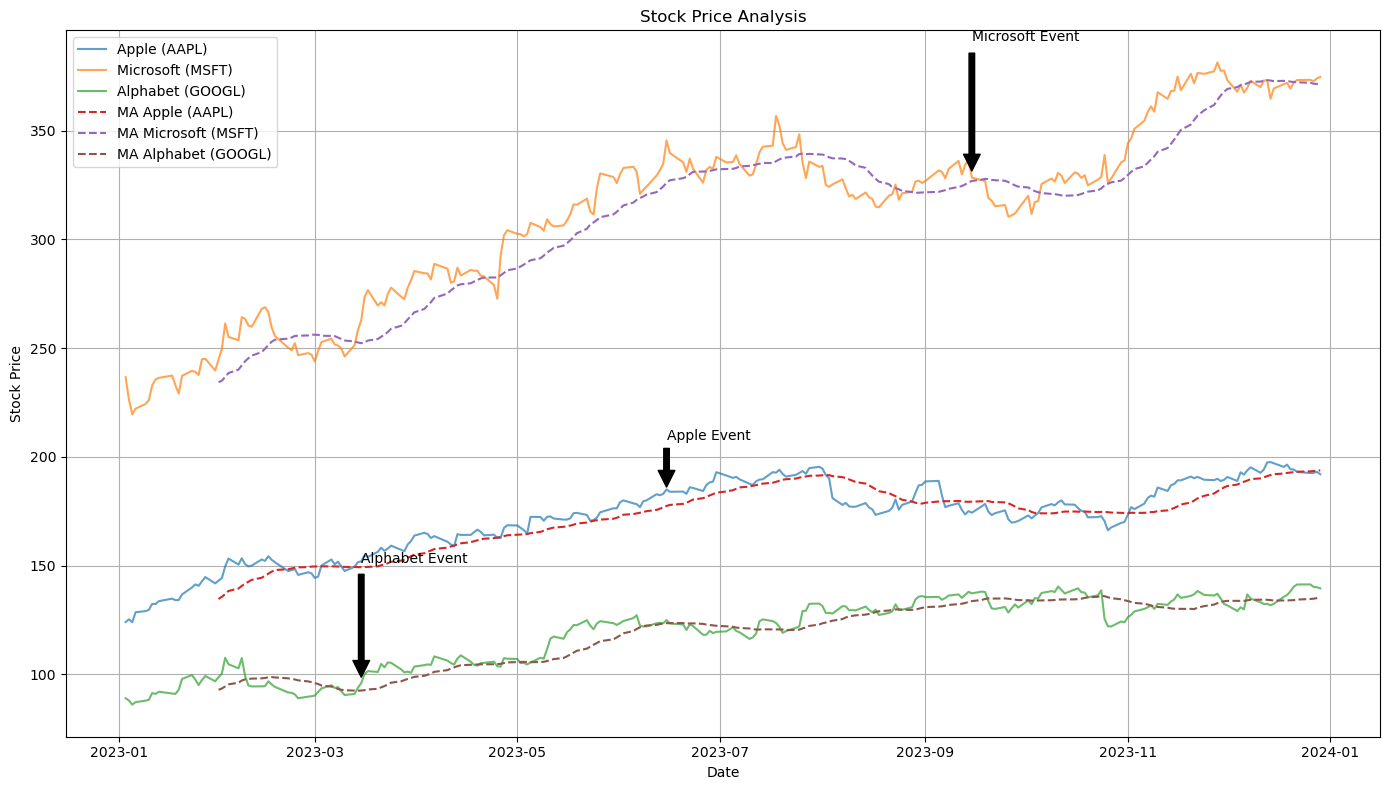

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical stock data for Apple, Microsoft, and Alphabet
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2022-07-01'
end_date = '2023-06-30'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Save the data to CSV
data.to_csv('historical_stock_prices.csv')

# Read the data
df = pd.read_csv('historical_stock_prices.csv', parse_dates=['Date'])

# Calculate the moving averages
df['MA_AAPL'] = df['AAPL'].rolling(window=20).mean()
df['MA_MSFT'] = df['MSFT'].rolling(window=20).mean()
df['MA_GOOGL'] = df['GOOGL'].rolling(window=20).mean()

# Plotting
plt.figure(figsize=(14, 8))

# Plot stock prices
plt.plot(df['Date'], df['AAPL'], label='Apple (AAPL)', alpha=0.7)
plt.plot(df['Date'], df['MSFT'], label='Microsoft (MSFT)', alpha=0.7)
plt.plot(df['Date'], df['GOOGL'], label='Alphabet (GOOGL)', alpha=0.7)

# Plot moving averages
plt.plot(df['Date'], df['MA_AAPL'], label='MA Apple (AAPL)', linestyle='--')
plt.plot(df['Date'], df['MA_MSFT'], label='MA Microsoft (MSFT)', linestyle='--')
plt.plot(df['Date'], df['MA_GOOGL'], label='MA Alphabet (GOOGL)', linestyle='--')

# Highlight significant events (example events)
# Convert the specific dates to datetime objects
event_dates = pd.to_datetime(['2023-06-15', '2023-09-15', '2023-03-15'])

# Add annotations
plt.annotate('Apple Event', xy=(event_dates[0], df.loc[df['Date'] == event_dates[0], 'AAPL'].values[0]),
             xytext=(event_dates[0], df['AAPL'].max() + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Microsoft Event', xy=(event_dates[1], df.loc[df['Date'] == event_dates[1], 'MSFT'].values[0]),
             xytext=(event_dates[1], df['MSFT'].max() + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Alphabet Event', xy=(event_dates[2], df.loc[df['Date'] == event_dates[2], 'GOOGL'].values[0]),
             xytext=(event_dates[2], df['GOOGL'].max() + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Labels and legend
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Analysis')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
Task 2: Customer Segmentation Analysis
Question: Visualize the results of a customer segmentation analysis using K-Means clustering. Use a dataset of customer purchase behavior, and create scatter plots to display clusters. Include:

Scatter plots of customers segmented into different clusters based on purchase frequency and amount.
Distinguish clusters with different colors and markers.
Annotate centroids of each cluster.

C:\Users\vs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


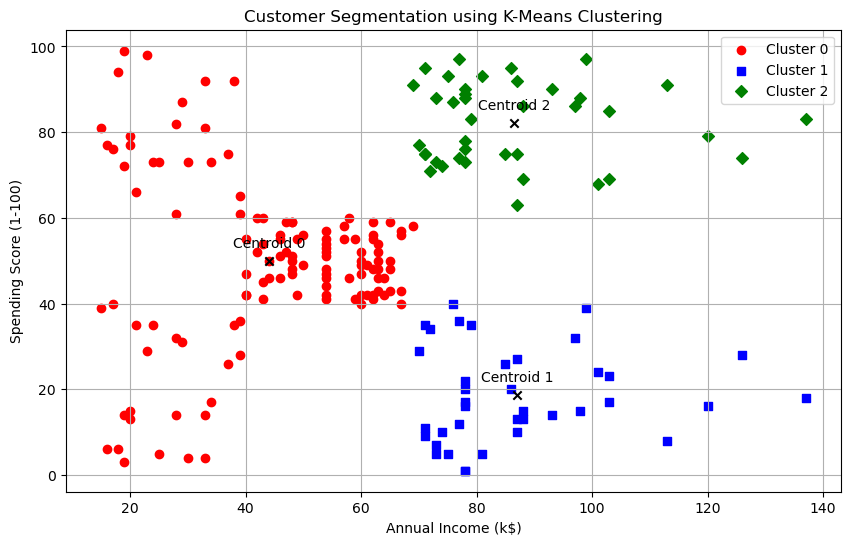

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'C:\\Users\\vs\\Downloads\\Mall_Customers.csv'   
data = pd.read_csv(file_path)

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['cluster'] = kmeans.labels_

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
colors = ['red', 'blue', 'green']
markers = ['o', 's', 'D']
for i in range(3):
    cluster_data = data[data['cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                color=colors[i], marker=markers[i], label=f'Cluster {i}')

# Annotate centroids
centroids = kmeans.cluster_centers_
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color='black', marker='x')
    plt.annotate(f'Centroid {idx}', (centroid[0], centroid[1]), textcoords='offset points', xytext=(0,10), ha='center')

# Labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means Clustering')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
